# Random Forests Lab 2


### Intro and objectives


### In this lab you will learn:
1. a basic example of a random forest classifier
### What I hope you'll get out of this lab
* Worked Examples
* How to interpret the results obtained

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
!pip3 install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.1")

In [4]:
sklearn.__version__

'1.2.1'

### In this lab we will learn how build a random forest-based classifier and determine the importance of each feature in the classification process


In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

## Let's import the iris dataset

In [6]:
iris = load_iris(as_frame=True)


In [7]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Let's create and train a random forest-based classifier consisted of 500 trees.

In [9]:


rnd_clf = RandomForestClassifier(n_estimators=500,  random_state=42)
rnd_clf.fit(iris.data.values, iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

## Let's run some predictions

In [10]:
iris.data[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
iris.data.loc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

In [12]:
rnd_clf.predict([iris.data.loc[0].values])

array([0])

In [13]:
iris.data.loc[100]

sepal length (cm)    6.3
sepal width (cm)     3.3
petal length (cm)    6.0
petal width (cm)     2.5
Name: 100, dtype: float64

In [14]:
rnd_clf.predict([iris.data.loc[100].values])

array([2])

In [15]:
rnd_clf.predict(iris.data.loc[0:10].values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Let's visualize the importance of each feature

In [16]:
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


#### It seems that the most important features are the petal length (44%) and width (42%), while sepal length and width are rather unimportant in comparison (11% and 2%, respectively)

## Let's visualize the boundaries of the random forest
### We explore the decision boundary for the two most relevant features: petal lengh and petal width 


In [17]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
iris.data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [19]:
iris.data[['petal length (cm)','petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [20]:
rnd_clf_topFeatures = RandomForestClassifier(n_estimators=500,  random_state=42)
rnd_clf_topFeatures.fit(iris.data[['petal length (cm)','petal width (cm)']].values, iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

In [21]:
iris.data[['petal length (cm)','petal width (cm)']]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


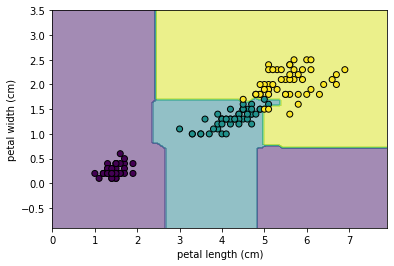

In [22]:
display = DecisionBoundaryDisplay.from_estimator(
...     rnd_clf_topFeatures, iris.data[['petal length (cm)','petal width (cm)']].values, response_method="predict",
...     xlabel=iris.feature_names[2], ylabel=iris.feature_names[3], alpha=0.5)



display.ax_.scatter(
...     iris.data['petal length (cm)'], iris.data['petal width (cm)'], c=iris.target, edgecolor="black")

### The previous figure reveals that petal lenght and petal width provide enough information for the random forest-based classifier to determine to which species each sample belongs to.